In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv('C:\\Users\\user\\Downloads\\Iris.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [20]:
data[['Species']].value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [5]:
data.drop(columns='Id', axis = 1, inplace= True)


In [6]:
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


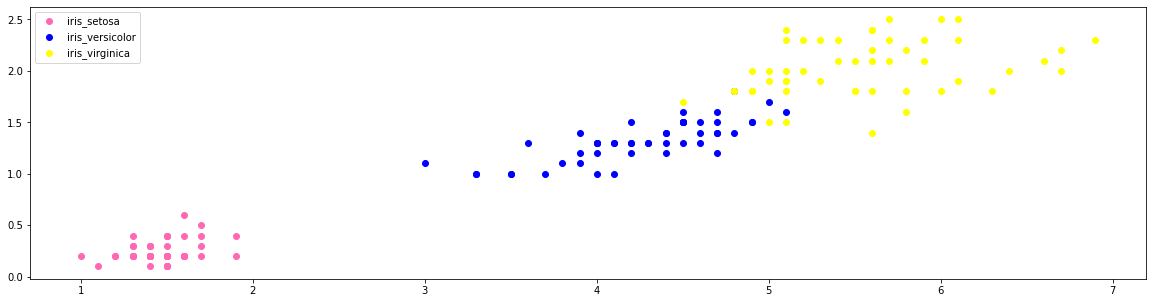

In [7]:
#visualization
iris_setosa = data[data[list(data.columns)[-1]] == "Iris-setosa"]
iris_versicolor = data[data[list(data.columns)[-1]] == "Iris-versicolor"]
iris_virginica = data[data[list(data.columns)[-1]] == "Iris-virginica"]

fig, axes = plt.subplots(1,1, figsize = (20,5))
axes.scatter(iris_setosa[['PetalLengthCm']], iris_setosa[['PetalWidthCm']], c = 'hotpink', label = 'iris_setosa')
axes.scatter(iris_versicolor[['PetalLengthCm']], iris_versicolor[['PetalWidthCm']], c = 'blue', label = 'iris_versicolor')
axes.scatter(iris_virginica[['PetalLengthCm']],iris_virginica[['PetalWidthCm']], c = 'yellow', label = 'iris_virginica')
axes.legend()
plt.show()

In [8]:
# labelling
X = data[list(data.columns)[:-1]]
Y = data[list(data.columns)[-1]]
Y.value_counts  # to check Y column
# label initializing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encodedY = encoder.fit_transform(Y)
encodedY

# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

In [9]:
# splitting and test-train
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.25, random_state= 4)

In [10]:
# naive bayes model
from sklearn import naive_bayes
nbmodel = naive_bayes.GaussianNB()
nbmodel.fit(xtrain,ytrain)
ypred = nbmodel.predict(xtest)

ypred == ytest # to check the prediction with ytest
(ypred == ytest).sum()/len(ytest) # to chk the prediction percentage

0.9736842105263158

In [11]:
#evaluation
from sklearn.metrics import confusion_matrix, f1_score
print('Confusion Matrix: \n', confusion_matrix(ypred, ytest))
print('F1-Score:', f1_score(ypred, ytest, average = None))

Confusion Matrix: 
 [[18  0  0]
 [ 0  8  1]
 [ 0  0 11]]
F1-Score: [1.         0.94117647 0.95652174]


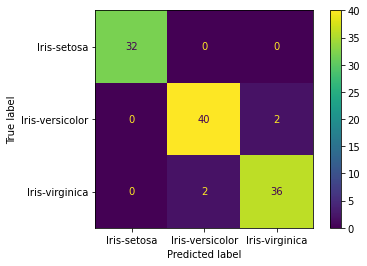

In [12]:
# plotting visualization
from sklearn import metrics
metrics.plot_confusion_matrix(nbmodel, xtrain,ytrain)

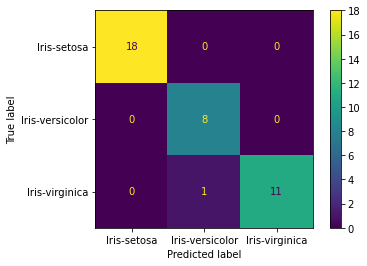

In [13]:
metrics.plot_confusion_matrix(nbmodel, xtest, ytest)

In [18]:
# Cross validation
import warnings
warnings.filterwarnings(action= 'ignore')

from sklearn.model_selection import cross_val_score
nbmodel = naive_bayes.GaussianNB()
cv = cross_val_score(
    nbmodel, scaledX, encodedY, cv = 4, scoring= 'accuracy'
)
cv.mean()
cv


array([0.94736842, 0.94736842, 0.91891892, 1.        ])

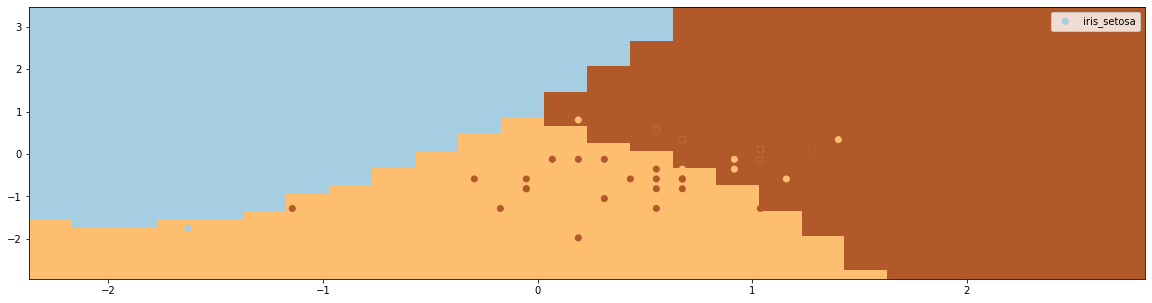

In [27]:
# Analysis
final_model = naive_bayes.GaussianNB()
final_model.fit(scaledX[:, :2], encodedY)

xmin , xmax = scaledX[:, 0].min() - .5, scaledX[:, 0].max() + .5
ymin, ymax = scaledX[:,1].min() - .5, scaledX[:,1].max() + .5

xx, yy = np.meshgrid(
    np.arange(xmin,xmax, 0.2), np.arange(ymin, ymax,0.2)
)
z = final_model.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)
plt.figure(1, figsize=(20,5))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx,yy,z)

plt.scatter(scaledX[:, 0], scaledX[:,1], c = encodedY)
#plt.legend(['iris_setosa', 'iris_versicolor', 'iris_virginica'])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [22]:
xx.shape

(15, 27)

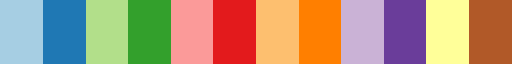

In [29]:
plt.cm.Paired

In [30]:
np.argmax([1,5,9])

2

In [31]:
np.argmin([1,6,4])

0

In [26]:
yy.shape
final_model.predict(np.c_[xx.ravel(), yy.ravel()]).shape

(405,)

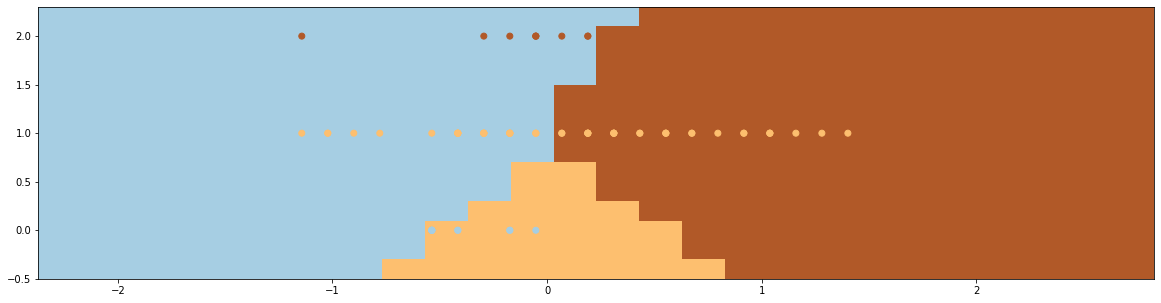

In [16]:
final_model = naive_bayes.GaussianNB()
final_model.fit(scaledX[:, :2], encodedY)
xmin, xmax = scaledX[:, 0].min() - .5, scaledX[:, 0].max() + .5
ymin, ymax = encodedY.min() - .5, encodedY.max() + 0.5

xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.2), np.arange(ymin, ymax, 0.2)
)
z = final_model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.figure(1, figsize=(20,5))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy,z)

plt.scatter(scaledX[:,0], encodedY, c = encodedY)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

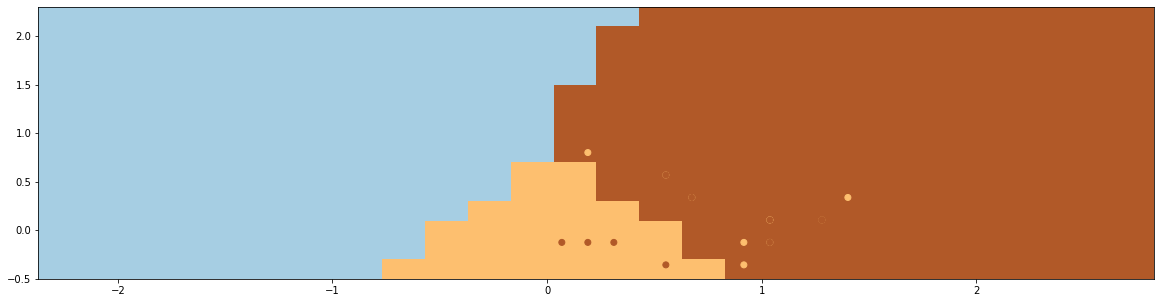

In [17]:
final_model = naive_bayes.GaussianNB()
final_model.fit(scaledX[:, :2], encodedY)
xmin, xmax = scaledX[:, 0].min() - .5, scaledX[:, 0].max() + .5
ymin, ymax = encodedY.min() - .5, encodedY.max() + 0.5

xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.2), np.arange(ymin, ymax, 0.2)
)
z = final_model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.figure(1, figsize=(20,5))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy,z)

plt.scatter(scaledX[:,0], scaledX[:,1], c = encodedY)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()